第1关 : 

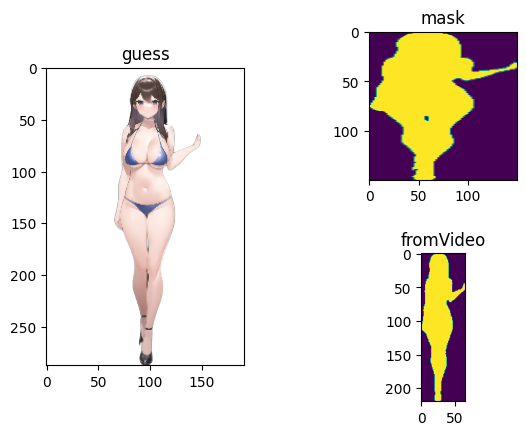

{"answer_url":"/media/8384c4459d2ac8a0d1c6d1bc6869a249/Result.mp4","result":true}

第2关 : 

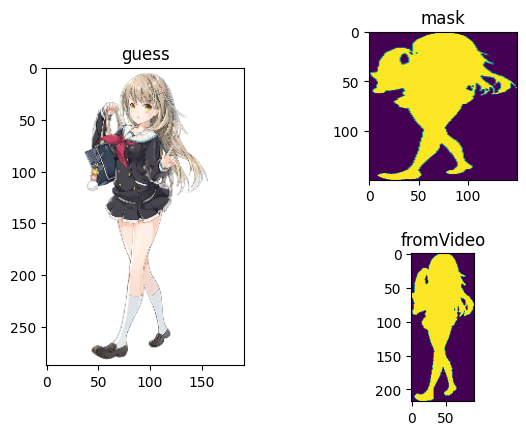

{"answer_url":"/media/46a0ce0ed91bcc855ef7e563081a2b63/Result.mp4","result":true}

第3关 : 

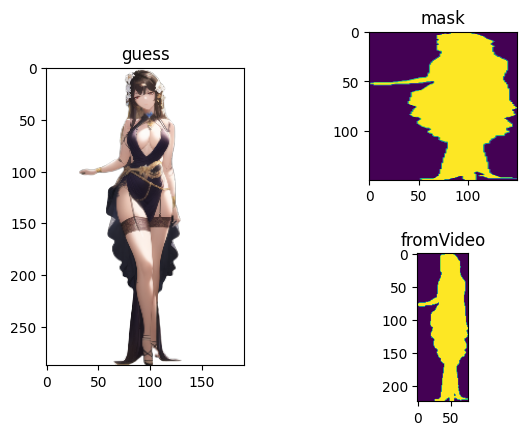

{"answer_url":"/media/3ee9d13098c9c48150f9f278e1f34a8c/Result.mp4","result":true}

第4关 : 

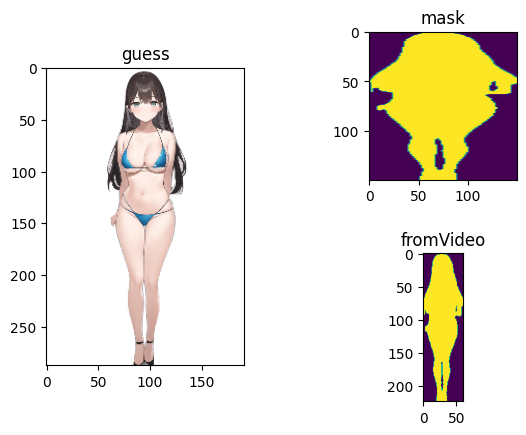

KeyboardInterrupt: 

In [22]:
import cv2 , matplotlib.pyplot as plt ,requests,numpy as np,re
from bs4 import BeautifulSoup
imgo = cv2.imread('all_girl.png',-1)[50:-1,50:-1]
h,w,_ = imgo.shape
hp = h//10
wp = w//10
def remMaskOuter(imgin:np.ndarray):
    y,x =np.where(imgin>0)
    return imgin[min(y):max(y),min(x):max(x)]//128*255
def v2pic(fn='tmp.mp4',size=(150,150),frame=50):
    mp4=cv2.VideoCapture('tmp.mp4')
    for i in range(frame):
        smallimg= mp4.read()
    mp4.release()
    if size==-1:
        return remMaskOuter(255-smallimg[1][130:380,300:440,1]//128*255)
    return cv2.resize(remMaskOuter(255-smallimg[1][130:380,300:440,1]//128*255),(150,150) )
piclist = [imgo[(i//10)*hp:(i//10)*hp+hp,(i%10)*wp:(i%10)*wp+wp,(2,1,0,3)] for i in range(100)]
masklist = np.array([cv2.resize(remMaskOuter(i[:,:,3]),(150,150) )for i in piclist])
url = 'http://f0ecfa5e-01d3-468e-bfd0-53e971468b1d.challenge.ctf.show/'
ses = requests.session()
for x in range(40):
    page=BeautifulSoup(ses.get(url+'check').text,'html')
    try:
        print(page.find('legend').text,end=' : ')
        mp4_url= page.find('source')['src']
    except:
        print(page)
        print(re.findall(r'(ctfshow{.*})',page.text ))
        break
    with open('tmp.mp4','wb') as tfile:
        tfile.write(ses.get(url+mp4_url).content)
    xorpic = np.sum(masklist.reshape(100,-1)^v2pic().flatten(),axis=1)
    pnum = np.where(xorpic==min(xorpic))[0][0]
    pname = f"{'ABCDEFGHIJ'[pnum//10]}{pnum%10}"
    # 以下为plt显示过程图像，可以删掉------------
    plt.clf()
    plt.subplot(131)
    plt.title('guess')
    plt.imshow(piclist[pnum])
    plt.subplot(132)
    plt.title('mask')
    plt.imshow(masklist[pnum])
    plt.subplot(133)
    plt.title('fromVideo')
    plt.imshow(v2pic(size=-1))
    plt.pause(0.1)
    #--------------------------------------------
    print(ses.get(url+'submit?guess='+pname).text)
    

    

['ctfshow{61ba09c1-f637-485b-ae92-5fc8088b02f6}']
